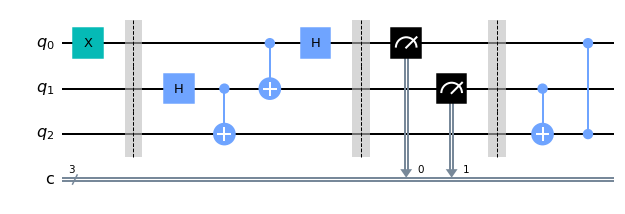

In [1]:
#Quantum Teleportation is the transfer of quantum information from one place to another
#Copying of quantum state is not allowed by the No cloning theorem
#we want to take the state from q0 and teleport it to q2
from qiskit import *
circuit = QuantumCircuit(3,3)  #3- quantum bits and 3-classical bits
circuit.x(0)
circuit.barrier()

#teleportation protocol
#create entanglement between q1 and q2
circuit.h(1)
circuit.cx(1,2)

circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1], [0,1])


circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output = 'mpl')

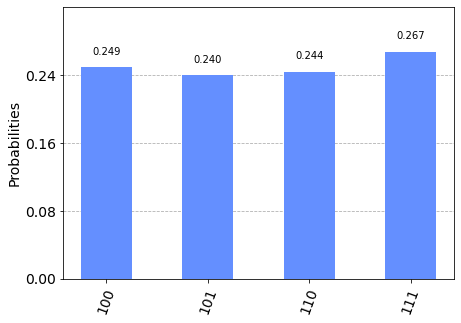

In [2]:
#the state that we have at the end of the barrier q0 
#is transmitted to q2
#we can verify by performing a measurement on q2 and studying the outcome

circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)


We only get output when c2 is one. This means that the state q0 is teleported to q2. We can also verify it by looking at the number of counts.

In [3]:
print(counts)

{'100': 255, '101': 246, '110': 250, '111': 273}
